## Final Project Submission

Please fill out:
* Student name: Sharon Maina 
* Student pace: part time 
* Scheduled project review date/time: 09/11/2022 11:59 pm 
* Instructor name: Antonny Muiko, Faith Rotich, Rose Delilah, Asha Deen
* Blog post URL:


## Business Problem
The purpose of this analysis is to answer the follwing questions:
1. Which specific genres have the highest audience ratings? Does the runtime of a movie affect its rating?
2. What is the correlation between the average movie rating and domestic & worldwide gross?
3. Does the amount of money put into producing a movie have an effect on the performance of the movie (profit)?

## Data
To carry out this analysis, I utilised data from online sites such as IMDB, Box Office Mojo and The Numbers.
### Loading the Data

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# preview movie titles dataset
movie_titles = pd.read_csv("zippedData/imdb.title.basics.csv.gz", compression='gzip')
movie_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
# preview the movie ratings dataset
movie_ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz", compression='gzip')
movie_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
# preview the movie gross dataset
movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz", compression='gzip')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", compression='gzip')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Cleaning
### Missing Values and Data Types
#### Movie Titles Dataset

In [6]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
# obtain the percentage of missing values per column
movie_titles.isna().mean()

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

In [8]:
# drop rows with missing genre values
movie_titles.dropna(subset='genres', axis=0, inplace=True)

In [9]:
# replace missing runtime values with the median of the column
movie_titles["runtime_minutes"].fillna(movie_titles["runtime_minutes"].median(), inplace=True)

In [10]:
# drop the original_title column
movie_titles.drop('original_title', axis=1, inplace=True)

Since only about 3.7% of the dataset had missing values in the genres column, rows with missing genres were dropped. However, since a significant number of records had missing values in the runtime_minutes column, missing values in this column were replaced with the median of the column, so as to avoid altering the distribution of the data, and to maintain the size of the dataset. The original_title column was dropped as this feature is not useful for this analysis.
#### Movie Ratings Dataset

In [11]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


There are no missing values in the movie_ratings dataset.
#### Movie Gross Dataset

In [12]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [13]:
# obtain the percentage of missing values per column
movie_gross.isna().mean()

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [14]:
# drop rows with missing studio values
movie_gross.dropna(subset='studio', axis=0, inplace=True)

In [15]:
movie_foreign_gross = movie_gross.loc[movie_gross["foreign_gross"].isna() == False, "foreign_gross"]

In [16]:
movie_foreign_gross = movie_foreign_gross.map(lambda x: float(x.replace(',', '')))

In [17]:
# replace the missing values in domestic_gross & foreign_gross columns with the median
movie_gross["domestic_gross"].fillna(movie_gross["domestic_gross"].median(), inplace=True)
movie_gross["foreign_gross"].fillna(str(movie_foreign_gross.median()), inplace=True)

In [18]:
# change the data type of columns
movie_gross["foreign_gross"] = movie_gross["foreign_gross"].map(lambda gross: float(gross.replace(',', '')))
movie_gross = movie_gross.astype({"domestic_gross": 'int64', "foreign_gross": 'int64'})

A very small number of rows had missing studio values, hence these rows were dropped. The missing values in the domestic_gross and foreign_gross columns were replaced with the median of the respective columns and the data types of these two columns were changed to int64.
#### Movie Budgets Dataset

In [19]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [20]:
# change the data type of columns
movie_budgets["production_budget"] = movie_budgets["production_budget"].map(lambda x: x.strip('$').replace(',', ''))
movie_budgets["domestic_gross"] = movie_budgets["domestic_gross"].map(lambda x: x.strip('$').replace(',', ''))
movie_budgets["worldwide_gross"] = movie_budgets["worldwide_gross"].map(lambda x: x.strip('$').replace(',', ''))

movie_budgets = movie_budgets.astype({"production_budget": 'int64', "domestic_gross": 'int64', "worldwide_gross": 'int64'})

There are no missing values in the movie_budgets dataset. The data types of the production_budget and gross columns however needed to be changed to int64. 

### Duplicates

In [21]:
movie_titles.duplicated(subset=["tconst", "primary_title", "start_year"]).value_counts()

False    140736
dtype: int64

In [22]:
movie_ratings.duplicated().value_counts()

False    73856
dtype: int64

In [23]:
movie_gross.duplicated(subset=["title", "studio", "year"]).value_counts()

False    3382
dtype: int64

In [24]:
movie_budgets.duplicated(subset=["release_date", "movie"]).value_counts()

False    5782
dtype: int64

There are no duplicates in any of the datasets used.

## Exploratory Data Analysis
**Question 1:** Which specific genres have the highest audience ratings? Does the runtime of a movie affect its rating?

In [25]:
movie_titles["num_genres"] = movie_titles["genres"].apply(lambda x: len(x.split(',')))

In [26]:
# join the movie_titles dataframe and the movie_ratings dataframe
movie_titles_and_ratings = movie_titles.merge(movie_ratings, on='tconst', how='inner')

In [27]:
# separate movies in terms of number of genres
one_genre = movie_titles_and_ratings.loc[movie_titles_and_ratings["num_genres"] == 1]

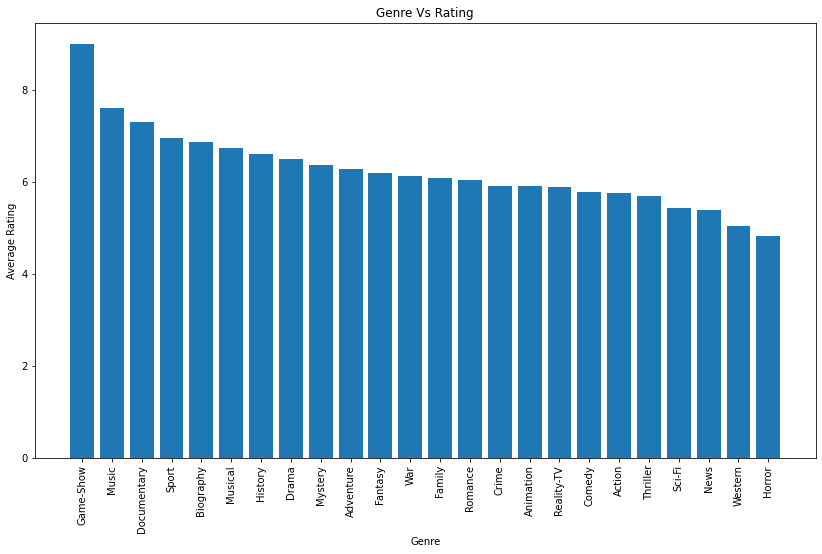

In [30]:
# plot a bar-chart to compare the different ratings across the genres
fig, ax = plt.subplots(figsize=(14,8))

ratings = one_genre.groupby("genres").mean()["averagerating"].sort_values(ascending=False)

ax.bar(ratings.index, ratings)
ax.set_title("Genre Vs Rating")
ax.set_xlabel("Genre")
ax.set_ylabel("Average Rating")
plt.xticks(rotation='90');

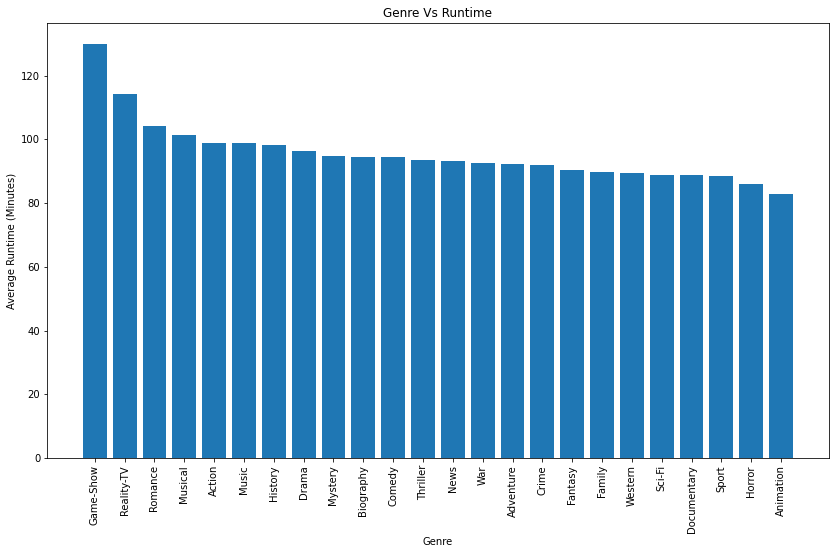

In [31]:
# plot a bar-chart to compare the average runtime across the genres
fig, ax = plt.subplots(figsize=(14,8))

runtime = one_genre.groupby("genres").mean()["runtime_minutes"].sort_values(ascending=False)

ax.bar(runtime.index, runtime)
ax.set_title("Genre Vs Runtime")       
ax.set_xlabel("Genre")
ax.set_ylabel("Average Runtime (Minutes)")
plt.xticks(rotation='90');

For ease of analysis, only the records with a single category in the genres column were considered. It was noted that the top 5 highest rated genres are Gameshow, Music, Documentary, Sport and Biography. The 5 genres with the highest runtimes are  Gameshow, Reality-TV, Romance, Musical and Action.  

**Question 2:** What is the correlation between the average movie rating and the domestic & worldwide gross? 

In [32]:
# join movie_ratings dataframe and movie_gross dataframe
movie_ratings_and_gross = movie_titles_and_ratings.merge(movie_gross, left_on='primary_title', right_on='title', how='inner')

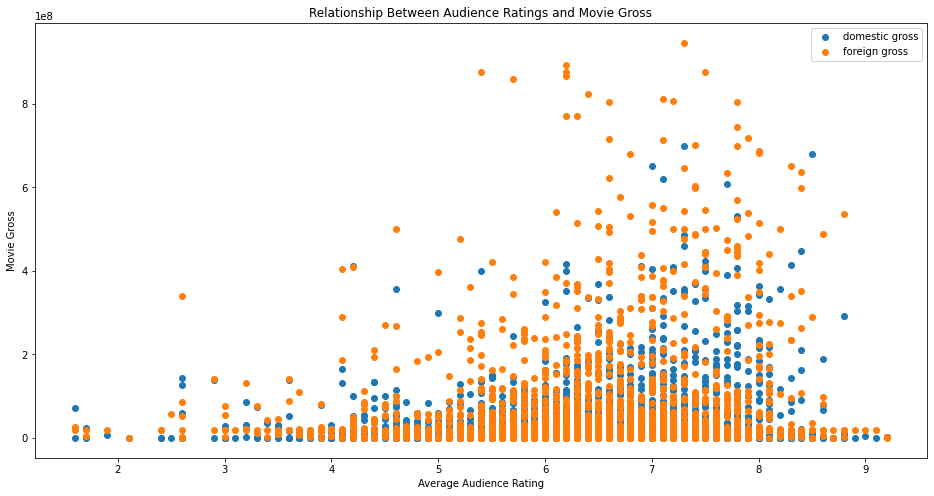

In [33]:
# plot a scatter plot of average rating vs gross
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(movie_ratings_and_gross["averagerating"], movie_ratings_and_gross["domestic_gross"], label='domestic gross')
ax.scatter(movie_ratings_and_gross["averagerating"], movie_ratings_and_gross["foreign_gross"], label='foreign gross')

ax.set_title("Relationship Between Audience Ratings and Movie Gross")
ax.set_xlabel("Average Audience Rating")
ax.set_ylabel("Movie Gross")

ax.legend();

From the scatter plot above, there is a small positive correlation between the audience rating and the domestic and foreign gross of a movie. As the audience rating increases, the movie gross increases for a good number of movies. 

**Question 3:** Does the amount of money put into producing a movie have an effect on the performance of a movie (profit)?

In [34]:
movie_budgets["domestic_profit"] = movie_budgets["domestic_gross"] - movie_budgets["production_budget"]
movie_budgets["worldwide_profit"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]

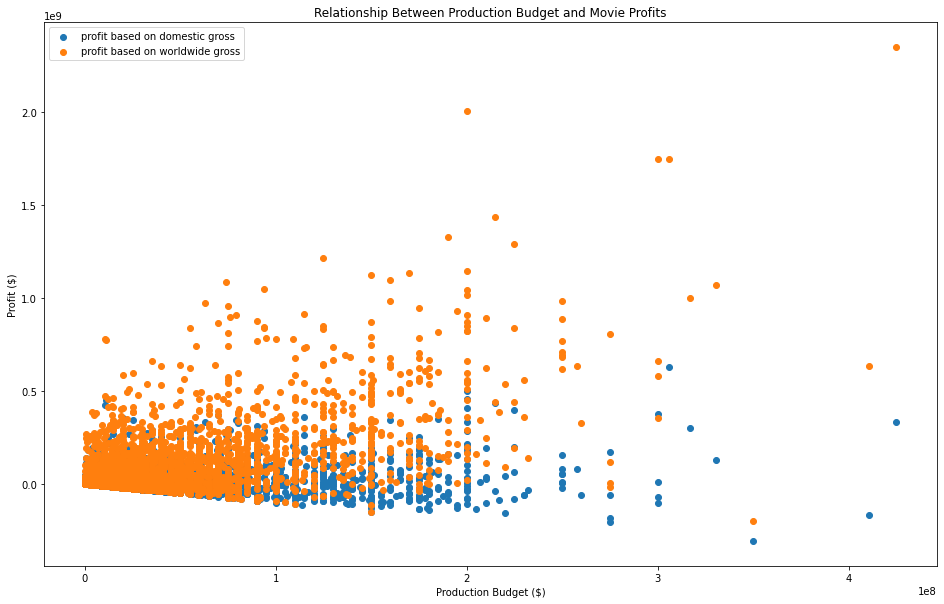

In [35]:
# scatter plot to show relationship between production budget & profit
fig, ax = plt.subplots(figsize=(16,10))

ax.scatter(movie_budgets["production_budget"], movie_budgets["domestic_profit"], label='profit based on domestic gross')
ax.scatter(movie_budgets["production_budget"], movie_budgets["worldwide_profit"], label='profit based on worldwide gross')

ax.set_title("Relationship Between Production Budget and Movie Profits")
ax.set_xlabel("Production Budget ($)")
ax.set_ylabel("Profit ($)")

ax.legend();

There is no clear correlation between production budget and movie profits.

### Conclusion
The following were concluded from the analysis above:
* The top 5 genres with the highest average audience ratings are: Game-show, Music, Documentary, Sport, Biography.
* The movie runtime does not have a significant impact on the rating a movie receives.
* To some level, the audience rating influences both the domestic and worldwide gross of a movie.
* A larger production budget does not guarantee greater profits.

### Recommendations
Based on the findings of the analysis carried out, I would make the following recommendations to Microsoft as they venture into the movie production industry:
1. Seeing the performance of the Game-show genre as well as the Music genre in termms of audience ratings, I recommend making a Game-show centered around music. Such a show will receive a high audience rating, increasing its chances of bringing in a higher gross.
2. In terms of films, I recommend making sports documentaries as these are two movie genres that seem to receive high ratings on their own. Incorporating the two genres in a single film may have positive results as it will appeal to two different demographics.
3. For the same reasons as above, I recommend producing biographies about musicians or sportsmen/sportswomen.